In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
#parametros

a = 1 
b = 1
d = 1
g = 1

#condicoes iniciais 

x0 = 2
y0 = 1

#tempo  passo de tempo
tf = 20 #tempo final 
h = 0.01 #passo de tempo 
t = np.arange(0, tf+h, h) #array com os pontos de tempo


In [116]:
def sistemaDeEquacoes(estado):
    x, y = estado
    dxdt = a*x - b*y*x #presa
    dydt = d*x*y - g*y #predador
    return np.array([dxdt, dydt])

In [117]:
def jacobiano(x, y):
    return np.array([[1 - h*(a - b*y), -h*(-b*x)],
                     [-h*(d*y), 1 - h*(d*x - g)]])

In [ ]:
def jacobianoNumerico(u,f):
    x,y = u
    dx = 1e-12
    j11 = (f([x+ dx, y])[0] - f([x,y])[0])/dx
    j12 = (f([x, y+dx])[0] - f([x,y])[0])/dx
    j21 = (f([x+ dx, y])[1] - f([x,y])[1])/dx
    j22 = (f([x, y+dx])[1] - f([x,y])[1])/dx
    return np.array([[j11,j12],
                     [j21,j22]])



In [119]:
def metodoDeNewton(f, x0,jac, maxit=10):
    x = x0
    for i in range(maxit):
        if (jac == 0):
            J = jacobiano(x[0], x[1])
        else:
            J = jacobianoNumerico(x,f)  
       

       #daqui pra baixo foi terceirizado so pro codigo rodar
        fx = f(x)
        delta = np.linalg.solve(J, -fx)
        x = x + delta
       
    return x

In [120]:
def metodoDeEulerImplicito(sistema, y0, t, h, calcJac=0):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n-1):
        #  y - y_anterior - h * sistema(y) = 0 equacao que o newton resolve 
        def funcao(yk):
            return yk - y[i] - h * sistema(yk)
        
        # metodo de newton
        y[i+1] = metodoDeNewton(funcao, y[i], calcJac)
    
    return y

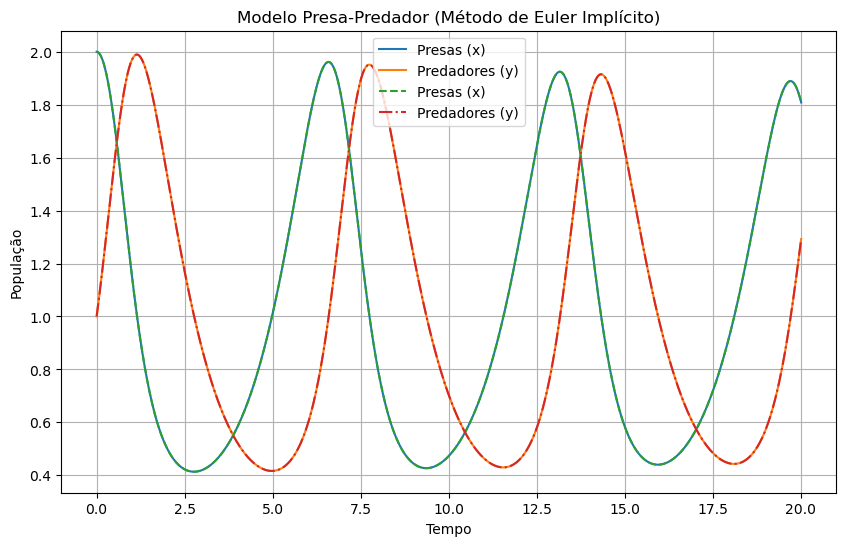

In [121]:
plt.figure(figsize=(10,6))
plt.grid(True)
solucao = metodoDeEulerImplicito(sistemaDeEquacoes, [x0, y0], t, h)

solucaoNum = metodoDeEulerImplicito(sistemaDeEquacoes, [x0, y0], t, h, calcJac=1)


plt.plot(t, solucao[:,0], label='Presas (x)') 
plt.plot(t, solucao[:,1], label='Predadores (y)') 

plt.plot(t, solucaoNum[:,0], '--', label='Presas (x)') 
plt.plot(t, solucaoNum[:,1], '-.', label='Predadores (y)') 


plt.legend()
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Modelo Presa-Predador (Método de Euler Implícito)')
plt.show()